In [13]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [5]:
# Load Data
headers = pd.read_csv('./../Data/header.txt', sep= ',', header=None,encoding='utf-8')
headers = headers.values.tolist()[0]

variables = [
    'gasto_familiar', 
    'cuota_rotativos',
#     'cuota_tarjeta_de_credito',
#     'cuota_tc_bancolombia',
#     'cupo_total_tc'
]

dataset = tf.data.experimental.make_csv_dataset(
    "./../Data/Dataton_train/Dataton_train_semicolon.csv",
    column_names = headers,
    na_value = '\\N',
    batch_size = 100000,
    num_epochs = 1,
    label_name = 'gasto_familiar',
    select_columns = variables,
    field_delim = ';'
)

In [6]:
def pack_features_vector(features, labels):
    """Pack the features into a single array."""
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

dataset = dataset.map(pack_features_vector)

In [7]:
validate_ds = dataset.take(100).cache().repeat()
train_ds = dataset.skip(100).take(100).cache().repeat()

# ( ) falta normalizar las entradas 
# ( ) normalizar la salida?

# > modelo 01

In [8]:
# Model
inputs = layers.Input(shape=(1,))
x = layers.Dense(32, activation='relu')(inputs)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(loss=tf.keras.losses.mean_absolute_percentage_error, optimizer='adam')
model.summary()


start_time = time.time()

# # By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
history = model.fit(
    train_ds,    
    validation_data = validate_ds,
    validation_steps = 1,
    steps_per_epoch = 5, 
    epochs = 20,
    verbose = 2
)

print("\n--- %s seconds ---" % (time.time() - start_time))

# # serialize weights to HDF5
model.save("./../Models/model_01.h5")
print("Saved model to disk: model_01.h5")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
Train for 5 steps, validate for 1 steps
Epoch 1/20
5/5 [==============================] - 108s 22s/step - loss: 146269164339.2000 - val_loss: 32744003584.0000
Epoch 2/20
5/5 [==============================] - 5s 1s/step - loss: 33412045516.8000 - val_loss: 

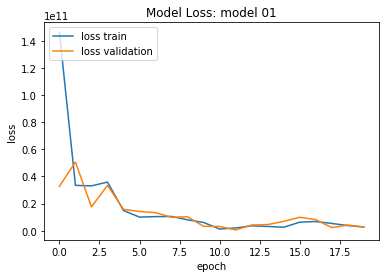

In [11]:
title_model = 'model 01'
# plot history for loss
plt.plot(history.history['loss'], label='loss train')
plt.plot(history.history['val_loss'], label='loss validation' )
plt.title('Model Loss: '+title_model)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

# > modelo 02

In [14]:
# input_shape = [timesteps, features]
nframes = 1
nfeatures = 1

model02 = models.Sequential()
model02.add(layers.Conv1D(32, 5, activation='relu', input_shape=(nframes, nfeatures)))
model02.add(layers.MaxPooling1D(2))
model02.add(layers.Conv1D(30, 5, activation='relu'))
model02.add(layers.MaxPooling1D(2))
model02.add(layers.Conv1D(16, 3, activation='relu'))
model02.add(layers.MaxPooling1D(2))
model02.add(layers.Conv1D(16, 3, activation='relu'))
model02.add(layers.Flatten())
model02.add(layers.Dense(16, activation='relu'))
model02.add(layers.Dropout(0.4))
model02.add(layers.Dense(1, activation='sigmoid'))
model02.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['Precision']) # , tf.keras.metrics.SpecificityAtSensitivity(0.5)])
model02.summary()


start_time = time.time()

# # By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
history = model.fit(
    train_ds,    
    validation_data = validate_ds,
    validation_steps = 1,
    steps_per_epoch = 5, 
    epochs = 20,
    verbose = 2
)

print("\n--- %s seconds ---" % (time.time() - start_time))

# # serialize weights to HDF5
model.save("./../Models/model_02.h5")
print("Saved model to disk: model_02.h5")

ValueError: Negative dimension size caused by subtracting 5 from 1 for 'conv1d/conv1d' (op: 'Conv2D') with input shapes: [?,1,1,1], [1,5,1,32].

In [ ]:
title_model = 'model 02'
# plot history for loss
plt.plot(history.history['loss'], label='loss train')
plt.plot(history.history['val_loss'], label='loss validation' )
plt.title('Model Loss: '+title_model)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()